# Estimate Pi

I saw an interview question on Reddit that said, "Given a function that randomly generates a number between 0 and 1, estimate Pi".  The question seems fun just from the question's construction alone.  So here goes...

### Explanation

Pi makes me think of circles, and I know the formula for the Area of a circle.  With a sampling, I can estimate the area of a circle.  The function can generate points from 0 to 1, so I will use a circle with a radius of 1, or more precisely a quarter of a circle.

I'll use the function to generate 2 random numbers between 0, 1.  These will be coordinates for a point (x,y).  If the point is less than a distance of 1 unit away, then it is inside the circle. We can estimate Pi using the ratio of points inside the circle to total points.

Some formulas
- Area of Shaded Arc = (Pi * r^2 ) / 4 
- We can use the ratio of num_sampes_in_shaded_area to num_samples_total to estimate the Area, so we end up with (Pi * r^2 ) / 4 = (num_sampes_in_shaded_area / num_samples_total)
    - Using with r=1, we can reduce to **Pi = 4 * (num_sampes_in_shaded_area / num_samples_total)**
    - num_sampes_in_shaded_area simply means the point's distance from origin is less than or equal to 1, Distance from origin = sqrt(x^2 * y°2)

If we use enough samples, we should get close to Pi.

See the image below for an illustration.

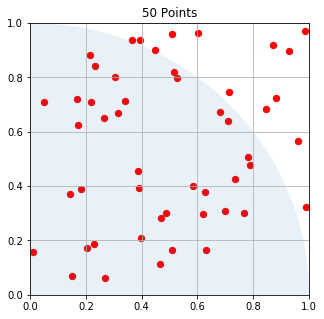

In [1]:
import math
from random import uniform
import time

from pylab import *
import matplotlib.patches as patches
import matplotlib.pyplot as plt

x = [uniform(0,1) for _ in range(50)]
y = [uniform(0,1) for _ in range(50)]
color=['m','g','r','b']

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

e1 = patches.Circle((0, 0), 1, alpha=0.1) # anegle=angle, linewidth=2, fill=False, zorder=2)
ax.add_patch(e1)
scatter(x,y, s=40 ,marker='o', c='r')

ax.set_xlim(0, 1.0)
ax.set_ylim(0, 1.0)
ax.set_title('50 Points')

grid()
show()

### Coding It...

In [2]:
round(math.pi,5)

3.14159

Let's see how close we can get with a reasonable enough compute time.

In [3]:
def estimate_pi(n=100):
    '''
    Estimate Pi by sampling.
    
    Parameters:
        n: <int> default: 100
            Number of samples we will make.

    Returns:
        <float> with our estimate of Pi
    '''    

    if not isintance(n, int):
        raise ValueError('n must be an int')
    
    num_total = 0
    num_in_circle = 0
    
    for _ in range(n):
        x = uniform(0,1)
        y = uniform(0,1)
        if math.sqrt(x**2 + y**2) <= 1:
            num_in_circle = num_in_circle + 1
        num_total = num_total + 1
    
    pi = 4 * num_in_circle / num_total
    return pi

In [4]:
for x in range(2,9):
    start = time.time()
    pi = estimate_pi(n=10**x)
    end = time.time()
    print(f"{round(pi,5)}\t10^{x} samples, elapsed: {round(end - start,5)} seconds")

3.32	10^2 samples, elapsed: 0.00059 seconds
3.172	10^3 samples, elapsed: 0.00548 seconds
3.1304	10^4 samples, elapsed: 0.07998 seconds
3.13992	10^5 samples, elapsed: 0.60106 seconds
3.14266	10^6 samples, elapsed: 5.58325 seconds
3.14099	10^7 samples, elapsed: 55.72556 seconds
3.1416	10^8 samples, elapsed: 551.9178 seconds


Not too bad, but as we get more accurate the computation time takes a looong time.

Can we make it go a bit faster by removing that sqrt?  Anything lower than 1 is going to have a sqrt lower than 1, and greater than 1 will have a sqrt greater than 1.

In [5]:
def estimate_pi_faster(n=100):
    '''
    Estimate Pi by sampling.
    
    Parameters:
        n: <int> default: 100
            Number of samples we will make.

    Returns:
        <float> with our estimate of Pi
    '''
    
    if not isintance(n, int):
        raise ValueError('n must be an int')

    num_total = 0
    num_in_circle = 0
    
    for _ in range(n):
        x = uniform(0,1)
        y = uniform(0,1)
        if x**2 + y**2 <= 1:
            num_in_circle = num_in_circle + 1
        num_total = num_total + 1
    
    pi = 4 * num_in_circle / num_total
    return pi

In [6]:
for x in range(2,9):
    start = time.time()
    pi = estimate_pi_faster(n=10**x)
    end = time.time()
    print(f"{round(pi,5)}\t10^{x} samples, elapsed: {round(end - start,5)} seconds")

2.92	10^2 samples, elapsed: 0.00057 seconds
3.132	10^3 samples, elapsed: 0.00532 seconds
3.1464	10^4 samples, elapsed: 0.0581 seconds
3.13736	10^5 samples, elapsed: 0.5966 seconds
3.14109	10^6 samples, elapsed: 5.52422 seconds
3.14151	10^7 samples, elapsed: 54.1633 seconds
3.14168	10^8 samples, elapsed: 565.61989 seconds


... *not really ;)*